In [1]:
import inclconf

inclconf.configure_includepath()

In [2]:
from src.fusion_detector import datasource

data = datasource.CifarDataSource(8)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
batch = next(iter(data.testset))
del data

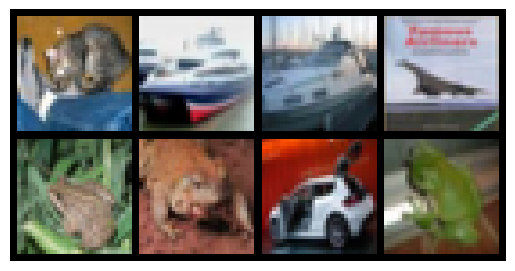

In [4]:
import torch

mean = (0.4914, 0.4822, 0.4465)
std = (0.2471, 0.2435, 0.2616)

def denormalize(x, mean, std) -> torch.Tensor:
    # 3, H, W, B
    ten = x.clone().detach().permute(1, 2, 3, 0)
    for t, m, s in zip(ten, mean, std):
        t.mul_(s).add_(m)
    # B, 3, H, W
    return torch.clamp(ten, 0, 1).permute(3, 0, 1, 2)


from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

to_image = transforms.ToPILImage()

ts = batch[0]
img = to_image(make_grid(denormalize(ts, mean, std), nrow=4))

plt.axis("off")
plt.imshow(img)
plt.show()

In [5]:
from src.fusion_detector import perturbation
import src.fusion_detector.thirdparty.pytorch_cifar10.module as M

resnet = M.resnet18(pretrained=True)
attack = perturbation.fgsm(resnet, epsilon=2/255)

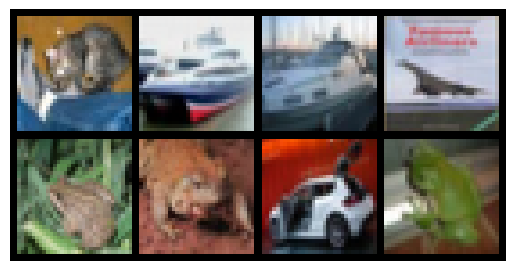

In [6]:
adv = attack(ts)
advimg = to_image(make_grid(denormalize(adv, mean, std), nrow=4))

plt.axis("off")
plt.imshow(advimg)
plt.show()

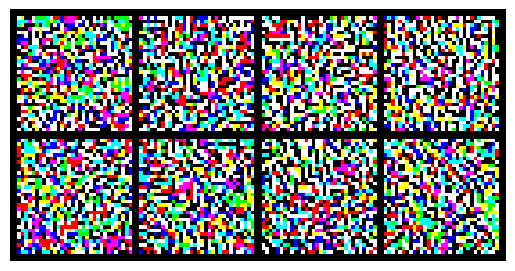

In [7]:
diff = adv - ts

plt.axis("off")
plt.imshow(to_image(make_grid(diff, nrow=4)))
plt.show()